In [1]:
import Pkg
Pkg.activate("../../../.")
include("../../../LogLoss/RealRealHighDimension.jl")
include("../../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [2]:
svpath_ns = "../../../Data/simple-synthetic/mps-saves/legendre_ns_d12_chi60.jld2";
dloc =  "../../../Data/simple-synthetic/datasets/simple_noisy_sine.jld2";

In [3]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [4]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 400 training samples and 100 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 12, chi_max = 60

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [5]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

In [27]:
max_jump=nothing
class = 0
interp_sites = collect(25:75)
instance_idx = 15
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=false, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, 
    xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);


(i, x_prev, mx) = (1, -0.23495033536294252, -0.1746)
(i, x_prev, mx) = (2, -0.1746, -0.1012)
(i, x_prev, mx) = (3, -0.1012, -0.0167)
(i, x_prev, mx) = (4, -0.0167, 0.0371)
(i, x_prev, mx) = (5, 0.0371, 0.0829)
(i, x_prev, mx) = (6, 0.0829, 0.1009)
(i, x_prev, mx) = (7, 0.1009, 0.0992)
(i, x_prev, mx) = (8, 0.0992, 0.0827)
(i, x_prev, mx) = (9, 0.0827, 0.0073)
(i, x_prev, mx) = (10, 0.0073, -0.0581)
(i, x_prev, mx) = (11, -0.0581, -0.1159)
(i, x_prev, mx) = (12, -0.1159, -0.2015)
(i, x_prev, mx) = (13, -0.2015, -0.2617)
(i, x_prev, mx) = (14, -0.2617, -0.344)
(i, x_prev, mx) = (15, -0.344, -0.3898)
(i, x_prev, mx) = (16, -0.3898, -0.447)
(i, x_prev, mx) = (17, -0.447, -0.4504)
(i, x_prev, mx) = (18, -0.4504, -0.4555)
(i, x_prev, mx) = (19, -0.4555, -0.4403)
(i, x_prev, mx) = (20, -0.4403, -0.3936)
(i, x_prev, mx) = (21, -0.3936, -0.3432)
(i, x_prev, mx) = (22, -0.3432, -0.237)
(i, x_prev, mx) = (23, -0.237, -0.165)
(i, x_prev, mx) = (24, -0.165, -0.0778)
(i, x_prev, mx) = (25, -0.0778, 

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│    MAE │ 0.260368 │
╰────────┴──────────╯


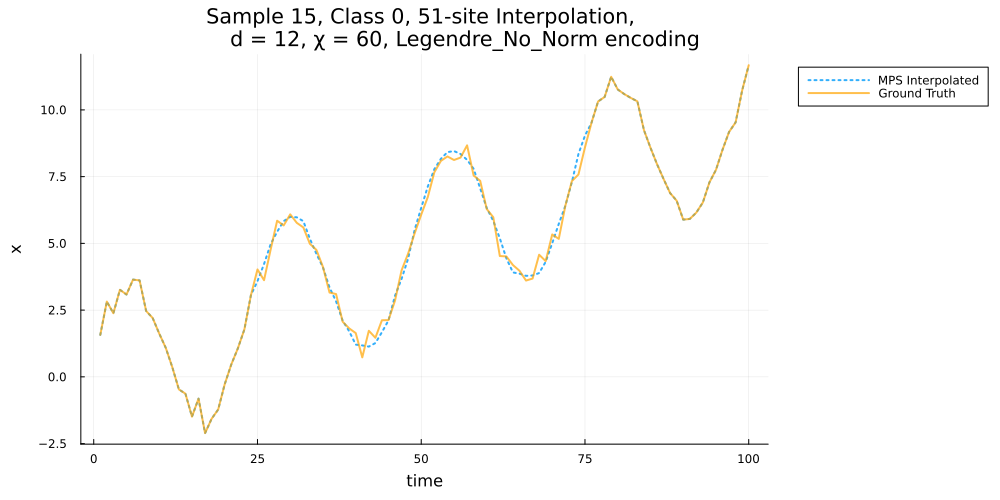

In [28]:
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...)